In [2]:
!pip install ultralytics tensorflow
!pip install paddlepaddle
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
# !pip install keras==2.9
# !pip install patchify    #To install and import other mentioned libraries  in code
# !pip install segmentation_models

In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
image_path = "/content/drop_car_front-0A413232.jpg"
model = YOLO('/content/best.pt')

# model.export(format='tfjs', imgsz=640, half=False, int8=False)

WARNING ⚠️ /content/best.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['omegaconf'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=b828a8860b935647adb5c2ac10c3bfcc1269f6aac41a598a01fedc9ae1c2e667
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozanmyf5/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e

In [ ]:
# image = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# results = model.predict(image_rgb )

# # Extracting bounding boxes and labels
# detected_image = results[0].plot()


0: 480x640 1 LicensePlate, 97.5ms
Speed: 4.2ms preprocess, 97.5ms inference, 774.3ms postprocess per image at shape (1, 3, 480, 640)


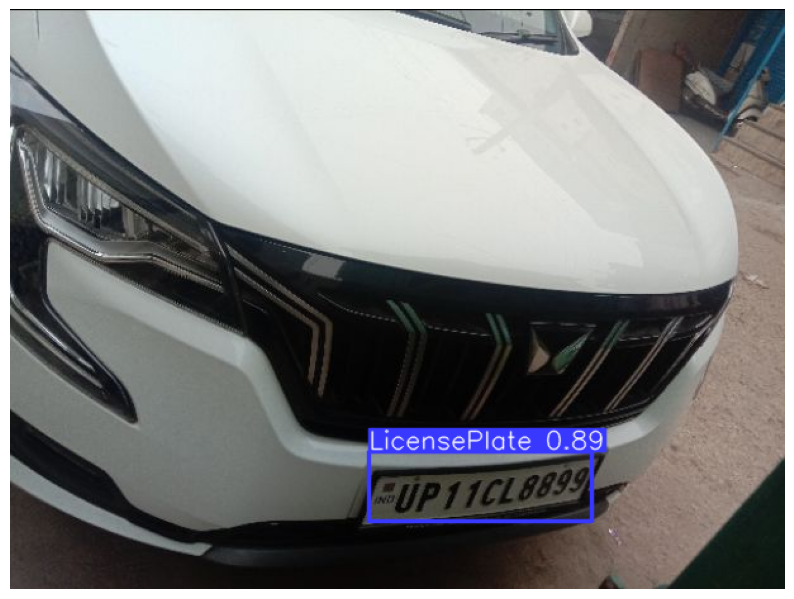

In [ ]:
# # Display the image with detections
# plt.figure(figsize=(10, 10))
# plt.imshow(detected_image)
# plt.axis('off')
# plt.show()

In [ ]:
from paddleocr import PaddleOCR
from PIL import Image

OCR = PaddleOCR(
    lang="en",
    det_limit_side_len=10_000,
    det_db_score_mode="slow",
)

PADDLE_OCR_LABEL = "PaddleOCR (en)"

def predict(image: Image.Image):
    image_np = np.array(image)

    if PADDLE_OCR_LABEL:
        ocr_result = OCR.ocr(image_np, cls=False)[0]

        if ocr_result is not None :
          words = [x[1][0] for x in ocr_result]

        else:
          return None

    return words

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 8.98MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:02<00:00, 4.00MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 4.35MiB/s]

[2024/06/12 12:25:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=10000, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='slow', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path

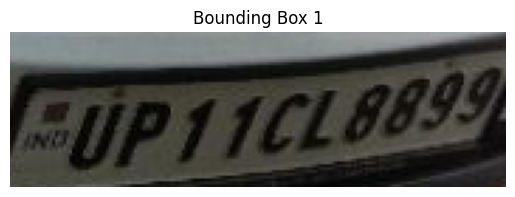

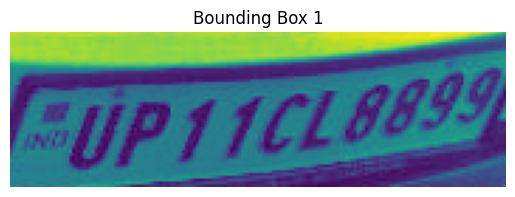

[2024/06/12 12:27:14] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.03708338737487793
[2024/06/12 12:27:14] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1586599349975586
OCR Result for Bounding Box 1:
['UP11CL8899']


In [ ]:
# # Extract bounding boxes and labels
# detected_image = results[0]
# bboxes = detected_image.boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
# confidences = detected_image.boxes.conf  # Confidences
# labels = detected_image.boxes.cls  # Class labels


#Crop the bounding box regions and pass them to OCR
def localize_num_plate(image,image_rgb):

  # Extract bounding boxes and labels
  detected_image = image
  bboxes = detected_image.boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
  confidences = detected_image.boxes.conf  # Confidences
  labels = detected_image.boxes.cls  # Class labels

  for i, bbox in enumerate(bboxes):
      x1, y1, x2, y2 = map(int, bbox)
      cropped_img = image_rgb[y1:y2, x1:x2]

      # Display the cropped image
      plt.figure()
      plt.imshow(cropped_img)
      plt.axis('off')
      plt.title(f'Bounding Box {i+1}')
      plt.show()
      # Convert the cropped image to grayscale for better OCR results
      gray_cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2GRAY)

      # Display the gray_cropped_img image
      plt.figure()
      plt.imshow(gray_cropped_img)
      plt.axis('off')
      plt.title(f'Bounding Box {i+1}')
      plt.show()

      return gray_cropped_img

In [ ]:
# !pip freeze > requirements.txt


In [ ]:
import supervision as sv

path = os.listdir(dir)
j = 0
for i in path[200:300]:
    image_path = os.path.join(dir,i)
    image = cv2.imread(image_path)

    sv.plot_image(image=image, size=(10, 10))
    #preprocessing image
    image = cv2.imread(image_path)
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model.predict(image)

    # Extracting bounding boxes and labels
    detected_image = results[0].plot()

    gray_scale_localized_plate = localize_num_plate(results[0],image)


    #get ocr text
    full_ocr = predict(gray_scale_localized_plate)
    if full_ocr:

      print(full_ocr)
    j += 1
    print(j)
    print(image_path)